## Assignment: $k$ Means Clustering

## **Do two questions.**

`! git clone https://www.github.com/DS3001/kmc`

In [2]:
! git clone https://github.com/lyurish00/DS3001/

Cloning into 'DS3001'...
remote: Enumerating objects: 193, done.
remote: Counting objects: 100% (193/193), done.
remote: Compressing objects: 100% (172/172), done.
remote: Total 193 (delta 60), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (193/193), 5.39 MiB | 6.40 MiB/s, done.
Resolving deltas: 100% (60/60), done.


**Q1.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.
2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).
3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.
4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.
5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?
6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

1. Load the airbnb_hw.csv data. Clean Price along with Beds, Number of Reviews, and Review Scores Rating.

In [4]:
df = pd.read_csv('/content/DS3001/kmc/data/airbnb_hw.csv')

In [5]:
df = df.loc[:,["Price", "Beds", "Number Of Reviews", "Review Scores Rating"]]

In [6]:
df['Beds'].unique()

array([ 1.,  3.,  2.,  4.,  5., nan,  6., 10.,  7.,  8., 12.,  0., 16.,
        9., 11.])

In [7]:
df['Beds'] = df['Beds'].fillna(1)
df['Price'] = df['Price'].str.replace(',','')
df['Price'] = pd.to_numeric(df['Price'],errors='coerce')
df = df.dropna()

In [8]:
df.dtypes

Price                     int64
Beds                    float64
Number Of Reviews         int64
Review Scores Rating    float64
dtype: object

In [9]:
df.head()

,Price,Beds,Number Of Reviews,Review Scores Rating
4,549,3.0,39,96.0
5,149,1.0,4,100.0
6,250,1.0,9,100.0
7,90,1.0,80,94.0
8,270,2.0,95,90.0


In [10]:
df.describe()

,Price,Beds,Number Of Reviews,Review Scores Rating
count,22155.000000,22155.000000,22155.000000,22155.000000
mean,154.787633,1.556985,16.505439,91.993230
std,148.836621,1.043273,24.308241,8.850373
min,10.000000,0.000000,1.000000,20.000000
25%,85.000000,1.000000,2.000000,89.000000
50%,125.000000,1.000000,7.000000,94.000000
75%,190.000000,2.000000,20.000000,100.000000
max,10000.000000,16.000000,257.000000,100.000000


2. Maxmin normalize the data and remove any nan's (KMeans from sklearn doesn't accept nan input).

In [11]:
def maxmin(x): # Max-min scaler function
    x = (x-min(x))/(max(x)-min(x))
    return x

In [12]:
Z = df.drop('Price',axis=1)
Z = Z.apply(maxmin) # Normalize the data

3. Use sklearn's KMeans module to cluster the data by Beds, Number of Reviews, and Review Scores Rating for k=6.

In [13]:
model = KMeans(n_clusters=6, max_iter=300, n_init = 10, random_state=0) # Create a model
model = model.fit(Z) # Fit the model
Z['cluster'] = model.labels_

4. Use seaborn's .pairplot() to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.

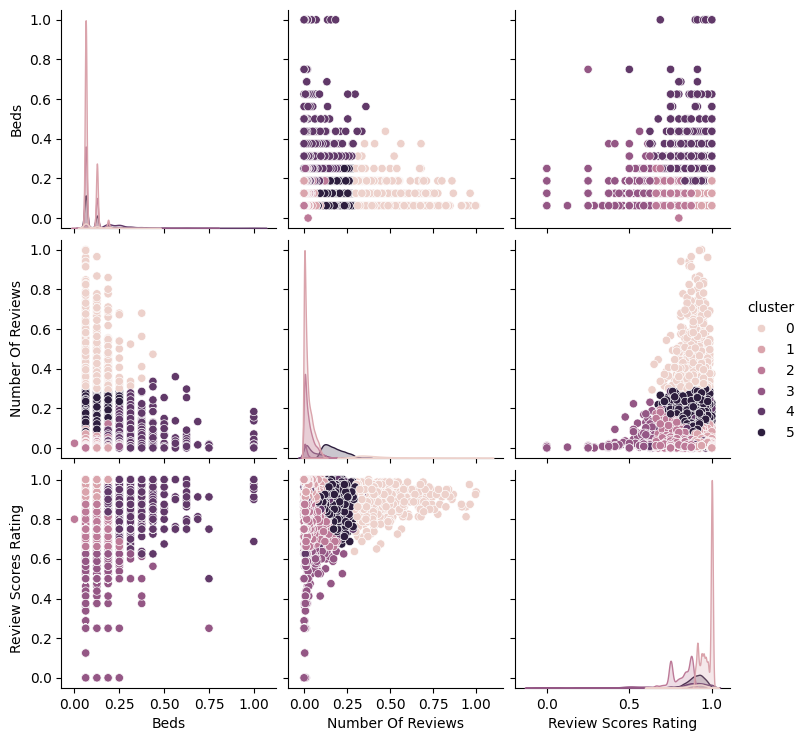

In [14]:
sns.pairplot(data=Z,hue='cluster')

5. Use .groupby and .describe to compute the average price for each cluster. Which clusters have the highest rental prices?

In [15]:
df['cluster'] = model.labels_
df.loc[:,['Price','cluster'] ].groupby('cluster').describe()

Price                                                              
           count        mean         std   min     25%    50%     75%      max
cluster                                                                       
0          794.0  133.238035   83.077776  27.0   80.00  110.0  168.50    875.0
1        10512.0  152.233352  147.281729  10.0   85.00  130.0  190.00  10000.0
2         5554.0  131.496579  102.621585  20.0   75.00  110.0  169.00   5000.0
3          632.0  133.587025  215.505565  25.0   65.00   99.0  151.25   5000.0
4         1633.0  293.458665  262.439199  27.0  150.00  229.0  350.00   4500.0
5         3030.0  141.674917   84.134011  22.0   87.25  125.0  175.00   1000.0

Based on the table above, cluster 4 stands out as the cluster with the highest average price at 293.46. Following this cluster is cluster 1 with an average price of 152.23. All of the remaining clusters are only slightly below the average of cluster 1, with a minimum of 131.50.

6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

Text(0.5, 1.0, 'Scree Plot')

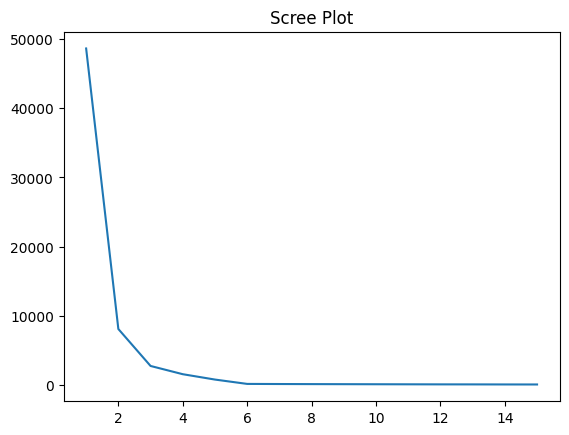

In [16]:
k_bar = 15
k_grid = np.arange(1,k_bar+1)
SSE = np.zeros(k_bar)
for k in range(k_bar):
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0)
    model = model.fit(Z)
    SSE[k] = model.inertia_

sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot')

Price                                                           
           count        mean         std   min   25%    50%    75%      max
cluster                                                                    
0        16860.0  144.507711  131.971650  10.0  80.0  125.0  180.0  10000.0
1         5295.0  187.520302  189.287613  22.0  93.0  145.0  220.0   5000.0

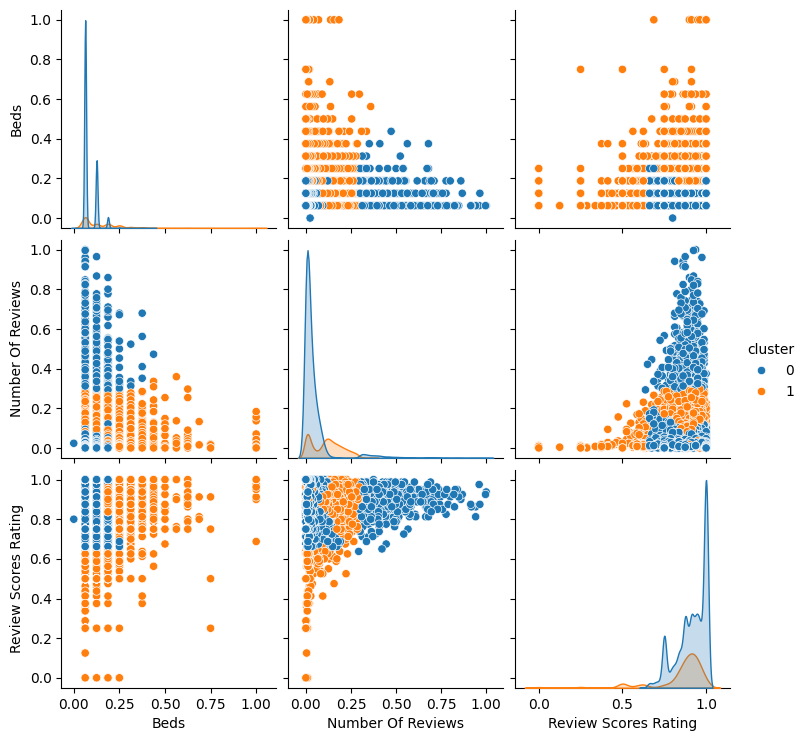

In [17]:
model = KMeans(n_clusters=2, max_iter=300, n_init = 10, random_state=0) # Create a model for
model = model.fit(Z) # Fit the emodel
Z['cluster'] = model.labels_

sns.pairplot(data=Z,hue='cluster')

df['cluster'] = model.labels_
df.loc[:,['Price','cluster'] ].groupby('cluster').describe()

**Q2.** This is a question about $k$ means clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$.
4. Explain the intuition of the elbow, using this numerical simulation as an example.

1. Run the code below, which creates four datasets: df0_125, df0_25, df0_5, df1_0, and df2_0. Each data set is created by increasing the amount of noise (standard deviation) around the cluster centers, from 0.125 to 0.25 to 0.5 to 1.0 to 2.0.

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans # Import kmc
import matplotlib.pyplot as plt

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

2. Make scatterplots of the  (X1,X2)  points by group for each of the datasets. As the noise goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?

<Axes: xlabel='x1', ylabel='x2'>

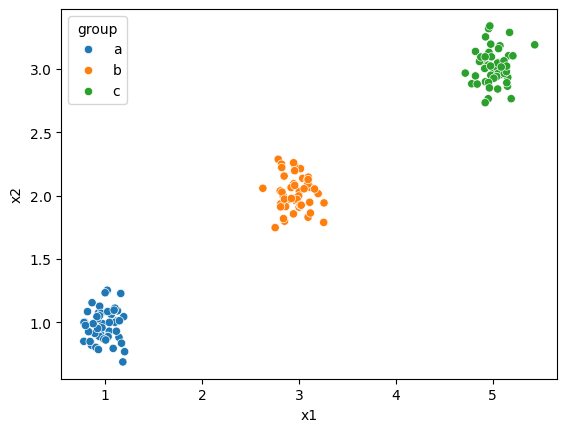

In [22]:
sns.scatterplot(data = df0_125, x = 'x1', y='x2', hue='group')

<Axes: xlabel='x1', ylabel='x2'>

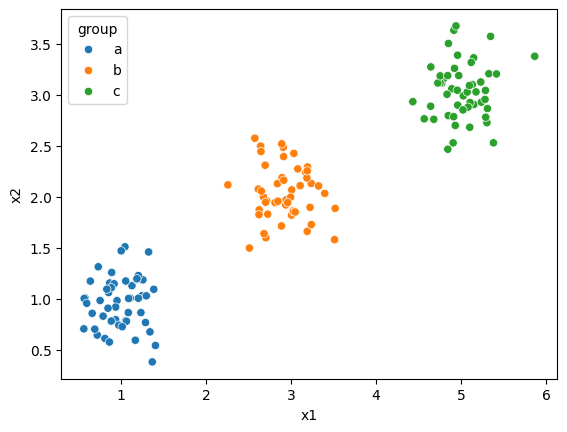

In [23]:
sns.scatterplot(data = df0_25, x = 'x1', y='x2', hue='group')

<Axes: xlabel='x1', ylabel='x2'>

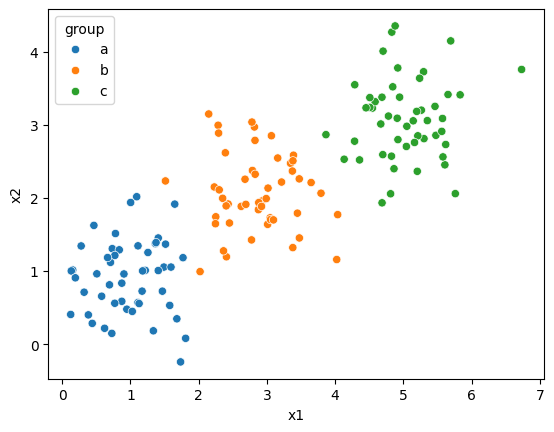

In [24]:
sns.scatterplot(data = df0_5, x = 'x1', y='x2', hue='group')

<Axes: xlabel='x1', ylabel='x2'>

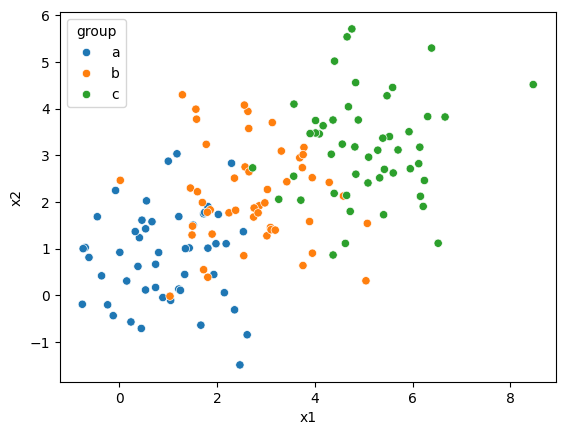

In [25]:
sns.scatterplot(data = df1_0, x = 'x1', y='x2', hue='group')

<Axes: xlabel='x1', ylabel='x2'>

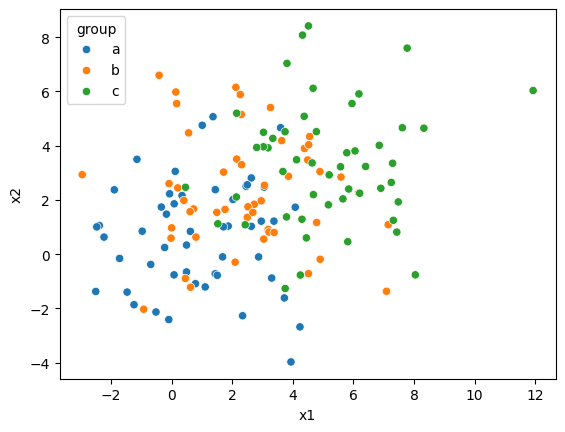

In [26]:
sns.scatterplot(data = df2_0, x = 'x1', y='x2', hue='group')

As the noise increases, the points in each group get less and less concentrated and the groups start overlapping between noisiness 0.5 and 1.0.

3. Create a scree plot for each of the datasets. Describe how the level of noise affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a  k .

Text(0.5, 1.0, 'Scree Plot 0.125')

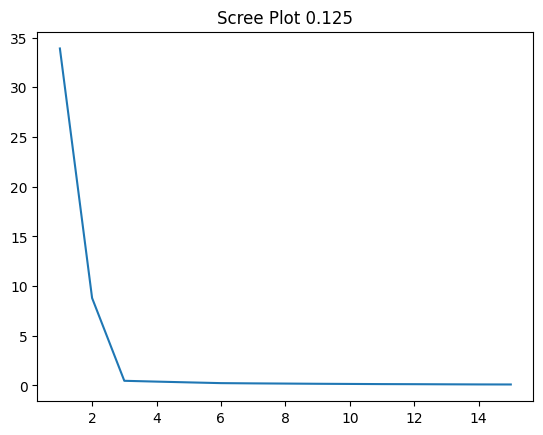

In [28]:
X = df0_125.loc[ : , ['x1','x2'] ] # Select data to cluster
# Z = df0_125.drop('x1',axis=1)
Z = X.apply(maxmin) # Normalize the data

k_bar = 15
k_grid = np.arange(1,k_bar+1)
SSE = np.zeros(k_bar)
for k in range(k_bar):
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0)
    model = model.fit(Z)
    SSE[k] = model.inertia_

sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot 0.125')

Text(0.5, 1.0, 'Scree Plot 0.25')

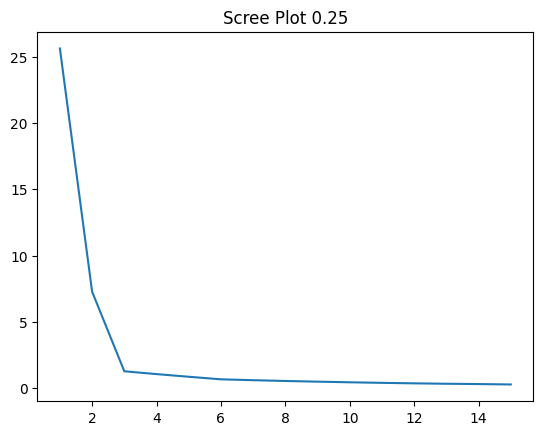

In [29]:
X = df0_25.loc[ : , ['x1','x2'] ] # Select data to cluster
Z = X.apply(maxmin) # Normalize the data

k_bar = 15
k_grid = np.arange(1,k_bar+1)
SSE = np.zeros(k_bar)
for k in range(k_bar):
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0)
    model = model.fit(Z)
    SSE[k] = model.inertia_

sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot 0.25')

Text(0.5, 1.0, 'Scree Plot 0.5')

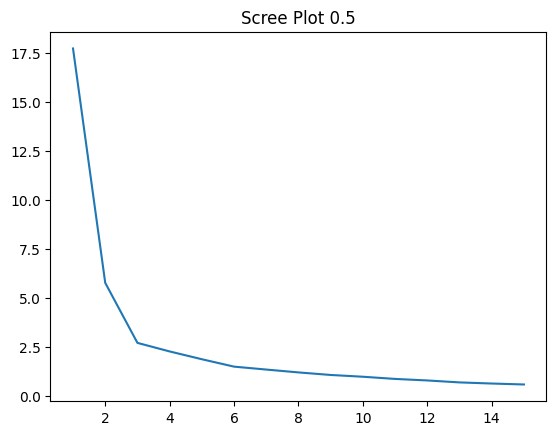

In [30]:
X = df0_5.loc[ : , ['x1','x2'] ] # Select data to cluster
Z = X.apply(maxmin) # Normalize the data

k_bar = 15
k_grid = np.arange(1,k_bar+1)
SSE = np.zeros(k_bar)
for k in range(k_bar):
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0)
    model = model.fit(Z)
    SSE[k] = model.inertia_

sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot 0.5')

Text(0.5, 1.0, 'Scree Plot 1.0')

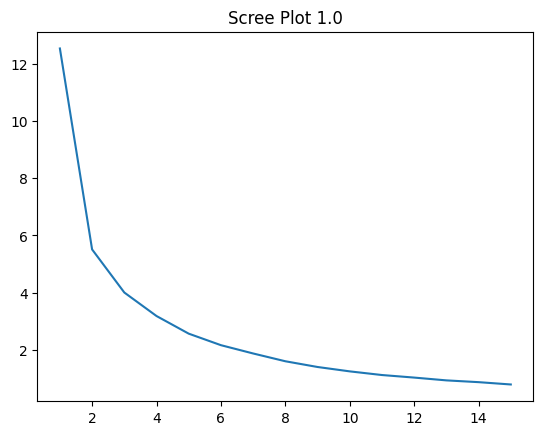

In [31]:
X = df1_0.loc[ : , ['x1','x2'] ] # Select data to cluster
Z = X.apply(maxmin) # Normalize the data

k_bar = 15
k_grid = np.arange(1,k_bar+1)
SSE = np.zeros(k_bar)
for k in range(k_bar):
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0)
    model = model.fit(Z)
    SSE[k] = model.inertia_

sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot 1.0')

Text(0.5, 1.0, 'Scree Plot 2.0')

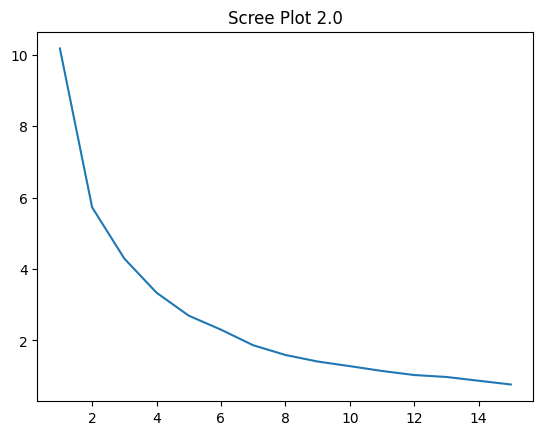

In [32]:
X = df2_0.loc[ : , ['x1','x2'] ] # Select data to cluster
Z = X.apply(maxmin) # Normalize the data

k_bar = 15
k_grid = np.arange(1,k_bar+1)
SSE = np.zeros(k_bar)
for k in range(k_bar):
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0)
    model = model.fit(Z)
    SSE[k] = model.inertia_

sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot 2.0')

As the noisiness increases in these dataset, the elbow of the resulting scree plots is less clear. When the noise is low, such as at 0.125 or 0.25, the point at which the slope changes is clear, and it is easier to pick a value for k. However, when the noise is rasied to 1.0 or 2.0 the elbow is quite hard to spot.

4. Explain the intuition of the elbow, using this numerical simulation as an example.

The smaller the SSE, the better the fit; however, at some point a change in k provides only a small marginal benefit. If the marginal benefit between k values is small, likely what is happening is a group is being split in half or the model is overfitted, which provides no benefit. Additionally, as shown in this example, the higher the noise, the less clear the elbow is. Comparing the scatterplots and the scree plots as noise increases, the groups of points in the scatterplots become overlapped around the same noise level as when the elbow in the scree plots becomes less clear. This shows that the level of bend of the elbow is similar to the lack of distinction / level of noise of the data groups/points.